In [2]:
import cv2

# 영상 및 비디오 입출력

## 실습 7. 비디오 캡쳐와 화면 표시 2(동영상 파일)

In [6]:
cap = cv2.VideoCapture('./data/vtest.avi')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# print(frame_size)

# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 240)

while True:
    retval, frame = cap.read() # 프레임 캡쳐
    if not retval:
        break
        
    cv2.imshow("frame1", frame)
    cv2.imshow("frame2", (255-frame))
    
    key = cv2.waitKey(25) # 약간의 시간 텀을 줌(ms)
    if key == 27: # ESC
        break
        
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

## 실습 8. 비디오 캡쳐와 화면 표시(외부 URL : 드로이드캠에서 촬영한 영상)

In [11]:
cap = cv2.VideoCapture('http://172.30.1.44:4747/videofeed') # 아이폰:videofeed , 안드로이드:jpegfeed

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))


# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 240)
print(frame_size)

while True:
    retval, frame = cap.read() # 프레임 캡쳐
    if not retval:
        break
        
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(25) # 약간의 시간 텀을 줌(ms)
    if key == 27: # ESC
        break
        
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

(640, 480)


## 실습 9. 비디오 캡쳐와 화면 표시(유튜브 동영상)

In [3]:
import pafy

In [5]:
url = 'https://www.youtube.com/watch?v=LiOI0iC9h-Q'

video = pafy.new(url) # meta정보 가져오기

print('title = ', video.title)
print('rating = ', video.rating)
print('duration = ', video.duration)

best = video.getbest() # 최적의 양식 생성

print("best resolution = ", best.resolution) # 최적의 해상도

cap = cv2.VideoCapture(best.url) # best.url : 다운로드 받을 수 있는 url 반환해줌

while True:
    retval, frame = cap.read()
    if not retval:
        break
        
    cv2.imshow("frame", frame)
    
    key = cv2.waitKey(25)
    if key == 27: 
        break
        
if cap.isOpened():
    cap.release()
    
cv2.destroyAllWindows()

title =  [#티전드] 무려 4연속 성공⭐ 신서유기 멤버들이 잘 맞춰서 기분 나쁜 나PDㅋㅋㅋ | #신서유기8 #Diggle | CJ ENM 201120 방송
rating =  4.8389339
duration =  00:16:35
best resolution =  1280x720


## 실습 10. 비디오 파일의 저장(기본 카메라로부터 얻은 영상)

In [4]:
cap = cv2.VideoCapture(0) # 비디오 캡쳐를 위해 객체 생성, 0: 첫번째 웹캠

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))

print(frame_size)

fourcc = cv2.VideoWriter_fourcc(*'XVID') # 코덱 정보

fps = 20.0 # 작게 주면 시간 당 보여주는 프레임 작으므로 천천히 보여줌

# cv2.VideoWriter(파일명, 코덱 정보, fps(초당 몇프레임 저장할지), 프레임 사이즈)

out1 = cv2.VideoWriter('./out/record1.mp4', fourcc, fps, frame_size) # 비디오 저장을 위한 객체 생성
out2 = cv2.VideoWriter('./out/record2.mp4', fourcc, fps, frame_size, isColor=False) # 색 없이 저장할 객체 생성

while True:
    retval, frame = cap.read() # 재생되는 비디오 한 프레임씩 읽기, 제대로 읽었으면 return value : true
    if not retval:             # 읽어오는 거 실패하면 멈추기
        break
        
    cv2.imshow("frame", frame) # 화면에 디스플레이
    
    out1.write(frame)          # 읽어온 프레임 저장
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # 흑백으로 변환하기, cv2가 기존에 BGR이므로
    
#     edges = cv2.Canny(gray, 100, 200)
#     cv2.imshow("edges", edges)
    
    out2.write(gray)

    
    key = cv2.waitKey(25)
    if key == 27: 
        break
        
if cap.isOpened():   # 오픈한 cap객체 해제
    cap.release()
    
out1.release()       # 오픈한 out1 객체 해제
out2.release()
cv2.destroyAllWindows() # 모든 윈도우 닫기

(640, 480)


## 실습10. 비디오 파일의 저장 2(Youtube에서 다운로드 받은 파일)

In [10]:
import pafy

url = 'https://www.youtube.com/watch?v=LiOI0iC9h-Q'

video = pafy.new(url) 
best = video.getbest()

cap = cv2.VideoCapture(best.url) 

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
fps = 20.0

out = cv2.VideoWriter('./out/record1.mp4', fourcc, fps, frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
        
    cv2.imshow("frame", frame)
    out.write(frame) 
    
    key = cv2.waitKey(25)
    if key == 27: 
        break
        
if cap.isOpened():
    cap.release()

out.release()
cv2.destroyAllWindows()

## 실습10. 비디오 파일의 저장 3(드로이드캠에서 얻어온 영상)

In [9]:
cap = cv2.VideoCapture('http://172.30.1.44:4747/videofeed')

frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
fps = 20.0

out = cv2.VideoWriter('./out/record2.mp4', fourcc, fps, frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
        
    cv2.imshow("frame", frame)
    out.write(frame) 
    
    key = cv2.waitKey(25)
    if key == 27: 
        break
        
if cap.isOpened():
    cap.release()

out.release()
cv2.destroyAllWindows()

## 그래픽 및 이벤트 처리

## 직선 및 사각형 그리기

In [11]:
import numpy as np

* 직선과 사각형 그리기

In [36]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 # np.uint8 : unsigned int, 하나를 표현하기 위해 8비트 씀

pt1 = 100, 100
pt2 = 400, 400

pt3 = 0, 0
pt4 = 500, 0

pt5 = 0, 0
pt6 = 0, 500

b = np.random.randint(256)
g = np.random.randint(256)
r = np.random.randint(256)

cv2.rectangle(img, pt1, pt2, (r, g, b), 2) # 사각형 그리기: 도화지, 점1, 점2, 색(b, g, r), 선의 굵기 
cv2.line(img, pt3, pt4, (b, g, r), 5)
cv2.line(img, pt5, pt6, (g, r, b), 5)


cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 직선과 사각형의 교차점 그리기

In [46]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

x1, y1 = 100, 100
x2, y2 = 400, 400

cv2.rectangle(img, (x1, y1), (x2, y2), (r, g, b), 2) # 사각형 그리기: 도화지, 점1, 점2, 색(b, g, r), 선의 굵기 

x3, y3 = 120, 50
x4, y4 = 300, 500

cv2.line(img, (x3, y3), (x4, y4), (b, g, r), 2)

imgRect = (x1, y1, x2-x1, y2-y1)
retval, rpt1, rpt2 = cv2.clipLine(imgRect, (x3, y3), (x4, y4))

if retval:
    cv2.circle(img, rpt1, radius=10, color=(b, g, r), thickness=-1) # 원 내부 색칠
    cv2.circle(img, rpt2, radius=10, color=(b, g, r), thickness=2)  # 원 내부 색칠 x
    
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 원 그리기

In [57]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

cx, cy = img.shape[0] // 2, img.shape[1] // 2

for r in range(200, 0, -100):
    cv2.circle(img, (cx, cy), r, color=(255, 0, 0), thickness=5) # 도화지, 중심점, 반지름, 색, 선 굵기

cv2.circle(img, (cx, cy), 50, color=(0, 0, 255), thickness=-1)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [49]:
img.shape[0], img.shape[1], img.shape[2]

(512, 512, 3)

* 타원 그리기

In [68]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

cx, cy = img.shape[0] // 2, img.shape[1] // 2

size = 200, 100

cv2.ellipse(img, (cx, cy), size, 0, 0, 360, (0, 0, 255)) # 도화지, 중심점, 가로세로 반지름, 기울기, 시작 각도, 끝 각도, 색
cv2.ellipse(img, (cx, cy), size, 45, 0, 360, (255, 0, 0))
cv2.ellipse(img, (cx, cy), size, 90, 0, 360, (0, 255, 0))


box = ((cx, cy), size, 0) # 중심점, 사이즈, 각도
cv2.ellipse(img, box, (255, 0, 0), 5)

box = ((cx, cy), size, 45)
cv2.ellipse(img, box, (0, 0, 255), 5)


cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

* 다각형 그리기

In [76]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

pts1 = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
pts2 = np.array([[300, 200], [400, 100], [400, 200]])

cv2.polylines(img, [pts1, pts2], isClosed=True, color=(255, 0, 0))


cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [84]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

cx, cy = img.shape[0] // 2, img.shape[1] // 2

size = 200, 100


# ellipse2Poly는 그려주는 함수는 아니고 점의 값만 받아오는 함수
# 점 구하는 함수: 중심점, 사이즈, 기울기, 시작 각도, 끝 각도, 점 찍는 각도
cv2.ellipse(img, (cx, cy), size, 0, 0, 360, (0, 0, 255))
pts1 = cv2.ellipse2Poly((cx, cy), size, 0, 0, 360, delta=45)

cv2.ellipse(img, (cx, cy), size, 45, 0, 360, (0, 0, 255))
pts2 = cv2.ellipse2Poly((cx, cy), size, 45, 0, 360, delta=45)


cv2.polylines(img, [pts1, pts2], isClosed= True, color=(255, 0, 0))

cv2.imshow('img', img) 
cv2.waitKey()
cv2.destroyAllWindows()

In [90]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

cx, cy = img.shape[0] // 2, img.shape[1] // 2

size = 200, 200


for angle in range(0, 90, 10):
    b = np.random.randint(256)
    g = np.random.randint(256)
    r = np.random.randint(256)
    
    box = ((cx, cy), size, angle)
    # cv2.boxPoints(box) : box 정보를 주면 해당 점을 구해줌
    pts = cv2.boxPoints(box).astype(np.int32)

    cv2.polylines(img, [pts], isClosed=True, color=(b, g, r))


cv2.imshow('img', img) 
cv2.waitKey()
cv2.destroyAllWindows()

In [92]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

pts1 = np.array([[100, 100], [200, 100], [200, 200], [100, 200]])
pts2 = np.array([[300, 200], [400, 100], [400, 200]])

# cv2.fillConvexPoly(img, pts1, color=(255, 0, 0)) # 1개
cv2.fillPoly(img, [pts1, pts2], color=(0, 0, 255)) # 여러 개

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 아래와 같은 그림 그리기

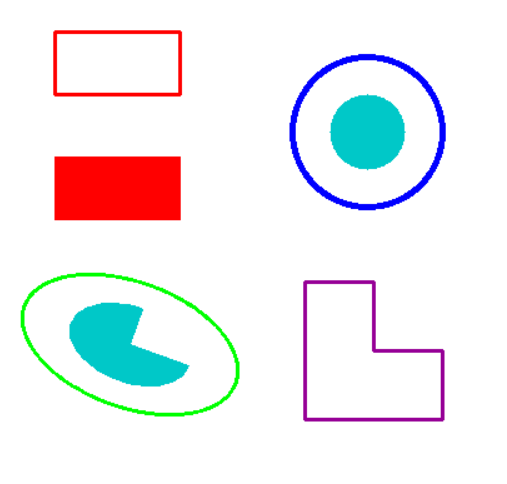

In [170]:
img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

x1, y1 = 50, 50
x2, y2 = 150, 100

cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
cv2.rectangle(img, (x1, y1+100), (x2, y2+100), (0, 0, 255), -1)

cx, cy = 300, 130
r = 60
cv2.circle(img, (cx, cy), r, (250, 0, 0), 3)
cv2.circle(img, (cx, cy), r-30, (200, 200, 0), -1)

cx2, cy2 = 110,300
size = 90, 50
size2 = 50, 30
cv2.ellipse(img, (cx2, cy2), size, 20, 0, 360, (0, 255, 0), 2)
cv2.ellipse(img, (cx2, cy2), size2, 20, 0, 270, (200, 200, 0), -1)

x3, y3 = 250, 250
pts1 = np.array([[x3, y3], [x3, y3+110], [x3+110, y3+110], [x3+110, y3+55], [x3+55, y3+55], [x3+55, y3]])
cv2.polylines(img, [pts1], isClosed=True, color=(150, 0, 150), thickness=2)

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 문자열 출력

OpenCV font : https://docs.opencv.org/4.5.2/d6/d6e/group__imgproc__draw.html

In [3]:
import cv2
import numpy as np

img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 

text = 'OpenCV Programming'
org = (50, 100) # 좌측 하단

font = cv2.FONT_HERSHEY_SIMPLEX
# 도화지, 텍스트, 폰트, 폰트 사이즈, 색, 두께
cv2.putText(img, text, org, font, 1, (255, 0, 0), 2)

# size: 텍스트의 width, height 사이즈
# baseline: org로부터의 높이
size, baseline = cv2.getTextSize(text, font, 1, 2)

cv2.rectangle(img, org, (org[0]+size[0], org[1]-size[1]), (0, 0, 255), 2) # 직사각형의 좌측 하단, 우측 상단 
cv2.circle(img, org, 3, (0, 255, 0), 2)
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

## 카운트다운 영상 만들기

In [6]:
import cv2
import numpy as np

size2 = 300
fourcc = cv2.VideoWriter_fourcc(*'XVID') 
fps = 1
out = cv2.VideoWriter('./out/countdown.mp4', fourcc, fps, (512, 512))

for i in range(5, -1, -1):
    img = np.zeros((512, 512, 3), dtype=np.uint8) + 255 
    cx, cy = img.shape[0] // 2, img.shape[1] // 2
    text = str(i)
    font = cv2.FONT_HERSHEY_SIMPLEX
    size, baseline = cv2.getTextSize(text, font, 6, 5)
    
    org = cx-(size[0]//2), cy+(size[1]//2)
    cv2.putText(img, text, org, font, 6, (0, 0, 0), 5)

    cv2.circle(img, (cx, cy), size2, (0, 255, 255), 5)
    size2 -= 40
    cv2.imshow('img', img)
    out.write(img)
    cv2.waitKey(1000)
    
cv2.waitKey(1000)
out.release()
cv2.destroyAllWindows()